In [1]:
import statistics

In [2]:
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from helpers import *
from regression import *

In [ ]:
ELO_DATE = '2025-11-10'
NUMBER_OF_SIMS = 10000
LEAGUE_ID = 109
SEASON = 2025
HEAD_SIZE = 24
COUNTRY_CODE_ELO = None
COUNTRY_CODE_API = 'POL'
STDEV = 10
UPDATE_FIXTURES = False

In [6]:
# download_elo_data(ELO_DATE)

In [7]:
# api_get_leagues()

In [8]:
# find_league_id('GB-ENG', 'Premier League')

# Brazil
# Brazil Serie A: 71

# England
# Premier League: 39
# Championship: 40
# League One: 41
# League Two: 42

# France
# Ligue 1: 61

# Germany
# Bundesliga: 78

# Italy
# Serie A: 135

# Poland
# Ekstraklasa: 106
# I Liga [Poland]: 107
# Polish Cup: 108
# II Liga - East [?] [Poland]: 109

# Romania
# Liga I: 283

# Scotland
# Premiership: 179

# Spain
# La Liga: 140

In [9]:
# df = get_api_teams_and_elo_from_clubelo(ELO_DATE, 'ENG')
# df.head(20)

In [10]:
# elo_drift_df = pd.merge(df, df2, how='inner', on='Club', suffixes=('_before', '_after'))
# elo_drift_df['Elo_Drift'] = elo_drift_df['Elo_after'] - elo_drift_df['Elo_before']
# season_stdev = statistics.stdev(elo_drift_df['Elo_Drift'])
# print(season_stdev)
# elo_drift_df.head(20)

452 ELO teams matched.
18 unmatched ELO teams found, see transformed/elo/elo_unmatched.csv:
464 Opta teams matched.
474 unmatched Opta teams found, see transformed/opta/opta_unmatched_map.csv:
683 unmatched Opta teams found, see transformed/opta/opta_unmatched_elo_df.csv:
433 teams used for regression.
0.928 R^2 score
y = 24.09 * x + -355.12


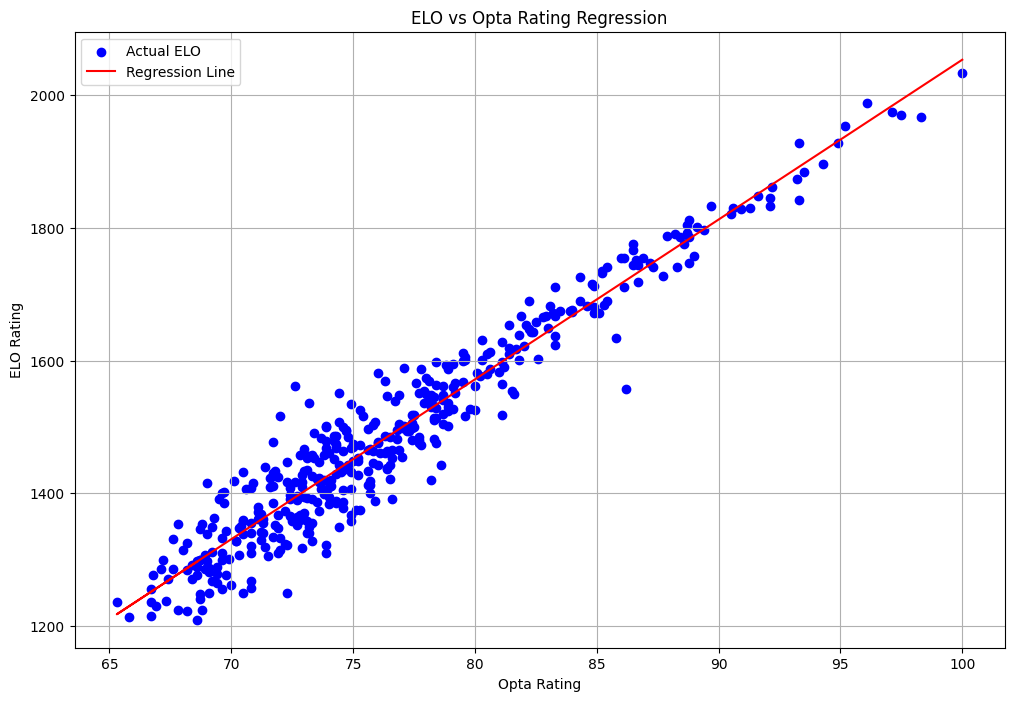

In [11]:
main_regression()

In [12]:
standings_df = build_historical_standings_table_after_at_most_n_rounds(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, update_fixtures=UPDATE_FIXTURES)
standings_df.head(HEAD_SIZE)

,Club,Elo,Points,Games played
1,Unia Skierniewice,1056.29,34,16
2,Warta Poznań,1094.82,33,17
3,Olimpia Grudziądz,1056.29,32,16
4,Podhale Nowy Targ,1008.12,26,16
5,Świt Skolwin,1017.75,25,16
6,Stal Stalowa Wola,1044.25,24,16
7,Zaglebie Sosnowiec,988.85,23,16
8,Sandecja Nowy Sącz,984.03,23,16
9,Śląsk Wrocław II,998.48,22,16
10,Resovia Rzeszów,1029.79,22,16


In [13]:
standings_df['Points'] = standings_df.apply(lambda x: x['Points']-5 if x['Club'] == 'Lechia Gdansk' else x['Points'], axis=1)
standings_df.head(HEAD_SIZE)

,Club,Elo,Points,Games played
1,Unia Skierniewice,1056.29,34,16
2,Warta Poznań,1094.82,33,17
3,Olimpia Grudziądz,1056.29,32,16
4,Podhale Nowy Targ,1008.12,26,16
5,Świt Skolwin,1017.75,25,16
6,Stal Stalowa Wola,1044.25,24,16
7,Zaglebie Sosnowiec,988.85,23,16
8,Sandecja Nowy Sącz,984.03,23,16
9,Śląsk Wrocław II,998.48,22,16
10,Resovia Rzeszów,1029.79,22,16


In [14]:
float(round(standings_df['Points'].sum() / standings_df['Games played'].sum(), 2))

1.34

In [15]:
sample_season = simulate_season_after_n_rounds(league_id=LEAGUE_ID, season=SEASON, standings_df=standings_df)
sample_season.head(HEAD_SIZE)

,Club,Points,Elo,Games played
5,Stal Stalowa Wola,62,1044.25,34
1,Warta Poznań,58,1094.82,35
0,Unia Skierniewice,57,1056.29,34
4,Świt Skolwin,55,1017.75,34
3,Podhale Nowy Targ,54,1008.12,34
9,Resovia Rzeszów,53,1029.79,34
2,Olimpia Grudziądz,52,1056.29,34
12,Sokół Kleczew,48,993.67,34
10,Podbeskidzie,46,1010.53,34
6,Zaglebie Sosnowiec,46,988.85,34


In [16]:
float(round(sample_season['Points'].sum() / sample_season['Games played'].sum(), 2))

1.36

In [17]:
# top 1
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=1, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [02:35<00:00, 64.21it/s]

10000 simulations
1 winning places


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Warta Poznań,4474,4191,44.7,41.9,2.24,2.39
2,Unia Skierniewice,3155,2887,31.6,28.9,3.17,3.46
3,Olimpia Grudziądz,1909,1729,19.1,17.3,5.24,5.78
4,Podhale Nowy Targ,131,99,1.3,1.0,76.34,101.01
5,Stal Stalowa Wola,124,102,1.2,1.0,80.65,98.04
6,Świt Skolwin,75,61,0.8,0.6,133.33,163.93
7,Resovia Rzeszów,46,36,0.5,0.4,217.39,277.78
8,Zaglebie Sosnowiec,23,17,0.2,0.2,434.78,588.24
9,Śląsk Wrocław II,16,13,0.2,0.1,625.00,769.23
10,Sandecja Nowy Sącz,13,11,0.1,0.1,769.23,909.09


In [18]:
# top 2
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=2, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [02:45<00:00, 60.49it/s]

10000 simulations
2 winning places


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Warta Poznań,7299,7064,73.0,70.6,1.37,1.42
2,Unia Skierniewice,6292,5989,62.9,59.9,1.59,1.67
3,Olimpia Grudziądz,4440,4156,44.4,41.6,2.25,2.41
4,Stal Stalowa Wola,502,421,5.0,4.2,19.92,23.75
5,Podhale Nowy Targ,472,402,4.7,4.0,21.19,24.88
6,Świt Skolwin,327,273,3.3,2.7,30.58,36.63
7,Resovia Rzeszów,203,175,2.0,1.8,49.26,57.14
8,Zaglebie Sosnowiec,115,99,1.2,1.0,86.96,101.01
9,Śląsk Wrocław II,99,77,1.0,0.8,101.01,129.87
10,Sandecja Nowy Sącz,84,66,0.8,0.7,119.05,151.52


In [19]:
# top 3
# results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=3, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
# results.head(HEAD_SIZE)

In [20]:
# top 6
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=6, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [02:45<00:00, 60.36it/s]


10000 simulations
6 winning places


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Warta Poznań,9839,9812,98.4,98.1,1.02,1.02
2,Unia Skierniewice,9734,9691,97.3,96.9,1.03,1.03
3,Olimpia Grudziądz,9404,9310,94.0,93.1,1.06,1.07
4,Stal Stalowa Wola,5283,4974,52.8,49.7,1.89,2.01
5,Podhale Nowy Targ,5023,4699,50.2,47.0,1.99,2.13
6,Świt Skolwin,4299,3964,43.0,39.6,2.33,2.52
7,Resovia Rzeszów,3272,3000,32.7,30.0,3.06,3.33
8,Zaglebie Sosnowiec,2561,2293,25.6,22.9,3.90,4.36
9,Śląsk Wrocław II,2309,2055,23.1,20.5,4.33,4.87
10,Sandecja Nowy Sącz,2162,1919,21.6,19.2,4.63,5.21


In [ ]:
# bottom 4
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=4, reverse=True, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [02:35<00:00, 64.45it/s]

10000 simulations
4 winning places
Reverse: TRUE


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Jastrzębie,9931,9916,99.3,99.2,1.01,1.01
2,ŁKS Łódź II,9837,9789,98.4,97.9,1.02,1.02
3,Kalisz,5025,4731,50.2,47.3,1.99,2.11
4,Hutnik Kraków,4878,4552,48.8,45.5,2.05,2.20
5,Sokół Kleczew,2223,1982,22.2,19.8,4.50,5.05
6,Rekord Bielsko-Biała,1908,1673,19.1,16.7,5.24,5.98
7,Chojniczanka Chojnice,1361,1178,13.6,11.8,7.35,8.49
8,Podbeskidzie,1195,1033,12.0,10.3,8.37,9.68
9,Śląsk Wrocław II,878,753,8.8,7.5,11.39,13.28
10,Sandecja Nowy Sącz,852,732,8.5,7.3,11.74,13.66
